In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# below function will update the Linear Regression
# co-efficient beta and return the updated beta
def gradient_descent(x, y, beta, alpha, m, iterations_num):
    # Variable to hold  is the transpose of x
    x_transposed = x.T
    
    mse = []

    # .T and the transpose() call both return the transpose of the array.
    # In fact, .T return the transpose of the array,
    # while transpose() is a more general method, that can be given
    # axes (transpose(*axes), with defaults that make the call transpose() equivalent to .T
    # .T is just a convenient notation,

    for i in range(0, iterations_num):
        hypothesis = np.dot(x, beta)

        # hypothesis - y is the first part of the square loss' gradient
        # (as a vector form for each component), and this is set to the loss variable.

        loss = hypothesis - y

        cost = np.sum(loss ** 2) / (2*m)
        
        mse.append(cost)

        # Now calculate the Vectorized Gradient from our earlier defined formulae

        vectorized_gradient = np.dot(x_transposed, loss) / m

        # now with above gradient update beta
        beta = beta - alpha * vectorized_gradient

        return mse, beta

In [90]:
db = pd.read_excel(
'db_lec3.xls',
sheet_name='db_lec3',
header=0
)
db = pd.concat([pd.Series(1, index=db.index, name='00'), db], axis=1)
x = db.values[:, 0:4]  # get input values from first two columns
y = db.values[:, 4]  # get output values from last coulmn

In [91]:
db.head()

,00,EXAM1,EXAM2,EXAM3,FINAL
0,1,73,80,75,152
1,1,93,88,93,185
2,1,89,91,90,180
3,1,96,98,100,196
4,1,73,66,70,142


In [92]:
y, x

(array([152, 185, 180, 196, 142, 101, 149, 115, 175, 164, 141, 141, 184,
        152, 148, 192, 147, 183, 177, 159, 177, 175, 175, 149, 192]),
 array([[  1,  73,  80,  75],
        [  1,  93,  88,  93],
        [  1,  89,  91,  90],
        [  1,  96,  98, 100],
        [  1,  73,  66,  70],
        [  1,  53,  46,  55],
        [  1,  69,  74,  77],
        [  1,  47,  56,  60],
        [  1,  87,  79,  90],
        [  1,  79,  70,  88],
        [  1,  69,  70,  73],
        [  1,  70,  65,  74],
        [  1,  93,  95,  91],
        [  1,  79,  80,  73],
        [  1,  70,  73,  78],
        [  1,  93,  89,  96],
        [  1,  78,  75,  68],
        [  1,  81,  90,  93],
        [  1,  88,  92,  86],
        [  1,  78,  83,  77],
        [  1,  82,  86,  90],
        [  1,  86,  82,  89],
        [  1,  78,  83,  85],
        [  1,  76,  83,  71],
        [  1,  96,  93,  95]]))

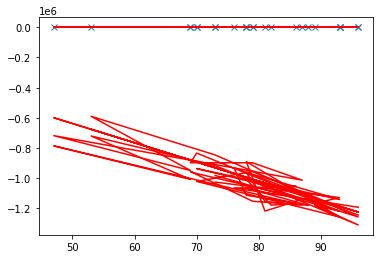

In [95]:
m, n = np.shape(x)
num_of_iterations = 100
alpha = 2
beta = np.ones(n)
mse, w = gradient_descent(x, y, beta, alpha, m, num_of_iterations)
plt.plot(x[:,1], y, "x")
plt.plot(x[:,1], x * w, "r-")
plt.show()

In [96]:
print("The parameters a, b, c, c are ", w)

The parameters a, b, c, c are  [  -156.92 -12747.56 -12818.92 -13090.68]


In [97]:
print("The beta vector is ", beta)

The beta vector is  [1. 1. 1. 1.]


In [98]:
print("MSE: ", mse)

MSE:  [3184.44]


In [99]:
mse

[3184.44]